<center><h1><font color=yellow><i> Deep Learning </i></font></h1></center>

## $Import$ $Libraries$ :

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import keras_tuner


## $Data$ :

<b><font color="skyblue">Step 1:</font></b>
 
- Import **data** (pandas dataframe). 

In [17]:
df_spam=pd.read_csv('spam.csv')
df_spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


<b><font color="skyblue">Step 2:</font></b>
 
- Separate the output (the column `spam`) and the input (the other columns). 

In [18]:
y=df_spam['spam']
X=df_spam.drop('spam',axis=1)

In [19]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


<b><font color="skyblue">Step 3:</font></b>
 
- Split our data into **train data** (80% -- 3680 rows) and **test data** (921 rows). 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## $Building$ $our$ $Model$ :

<b><font color="skyblue">Step 1:</font></b>
 
- Creation of our model using **Keras**.

In [7]:
model = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=[57], name='hidden_layer1'),
    layers.Dropout(0.3),  # Ajout d'une couche Dropout pour réduire le surajustement
    layers.Dense(100, activation='relu', name='hidden_layer2'),
    layers.Dropout(0.3),  # Ajout d'une couche Dropout pour réduire le surajustement
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid', name='output_layer'),  # Changement de l'activation en 'sigmoid'
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 100)               5800      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                        

<b><font color="skyblue">Step 2:</font></b>
 
- Precise the `optimizer`, the `loss-fonction` & the `metric`.

In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

<b><font color="skyblue">Step 3:</font></b>
 
- Train the model.

In [10]:
hist = model.fit(X_train,
                 y_train,
                 batch_size=32,
                 epochs=50,
                 validation_split=0.2)

Epoch 1/50
92/92 [==============================] - 1s 5ms/step - loss: 0.6856 - accuracy: 0.6556 - val_loss: 0.6141 - val_accuracy: 0.6698
Epoch 2/50
92/92 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.6940 - val_loss: 0.6069 - val_accuracy: 0.6698
Epoch 3/50
92/92 [==============================] - 0s 2ms/step - loss: 0.5782 - accuracy: 0.7181 - val_loss: 0.5824 - val_accuracy: 0.6753
Epoch 4/50
92/92 [==============================] - 0s 2ms/step - loss: 0.5715 - accuracy: 0.7201 - val_loss: 0.5750 - val_accuracy: 0.6834
Epoch 5/50
92/92 [==============================] - 0s 2ms/step - loss: 0.5420 - accuracy: 0.7327 - val_loss: 0.5477 - val_accuracy: 0.6929
Epoch 6/50
92/92 [==============================] - 0s 2ms/step - loss: 0.5129 - accuracy: 0.7476 - val_loss: 0.5445 - val_accuracy: 0.6943
Epoch 7/50
92/92 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.7734 - val_loss: 0.5591 - val_accuracy: 0.6780
Epoch 8/50
92/92 [==

<b><font color='red'>PS :</font></b> The accuracy of our model on the validation data is **94%**

<b><font > Keras tuner </font></b> 

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8)

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units1', min_value=50, max_value=200, step=10),
                           activation='relu', input_shape=[57], name='hidden_layer1'))
    model.add(layers.Dropout(hp.Float('dropout1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.Dense(units=hp.Int('units2', min_value=50, max_value=200, step=10),
                           activation='relu', name='hidden_layer2'))
    model.add(layers.Dropout(hp.Float('dropout2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(1, activation='sigmoid', name='output_layer'))
    
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Choisissez le nombre d'essais que vous voulez
    executions_per_trial=3,  # Nombre d'exécutions par essai pour réduire la variabilité
    directory='my_dir',
    project_name='keras_tuner'
)

tuner.search_space_summary()  # Afficher un résumé de l'espace de recherche des hyperparamètres

tuner.search(X_train, y_train,
             epochs=10,
             validation_data=(X_val, y_val))

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]


Reloading Tuner from my_dir\keras_tuner\tuner0.json


Search space summary
Default search space size: 5
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 10, 'sampling': 'linear'}
dropout1 (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 10, 'sampling': 'linear'}
dropout2 (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


C:\Users\zaiss\AppData\Local\Temp\ipykernel_56080\3547463802.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [13]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 150)               8700      
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 70)                10570     
                                                                 
 dropout_1 (Dropout)         (None, 70)                0         
                                                                 
 batch_normalization (Batch  (None, 70)                280       
 Normalization)                                                  
                                                                 
 output_layer (Dense)        (None, 1)                 71        
                                                        

In [14]:
tuner.results_summary(num_trials=5)


Results summary
Results in my_dir\keras_tuner
Showing 5 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
units1: 150
dropout1: 0.2
units2: 70
dropout2: 0.2
learning_rate: 0.01
Score: 0.9352355003356934

Trial 3 summary
Hyperparameters:
units1: 60
dropout1: 0.30000000000000004
units2: 150
dropout2: 0.4
learning_rate: 0.01
Score: 0.8759057919184366

Trial 2 summary
Hyperparameters:
units1: 120
dropout1: 0.4
units2: 150
dropout2: 0.30000000000000004
learning_rate: 0.0001
Score: 0.7164855003356934

Trial 0 summary
Hyperparameters:
units1: 100
dropout1: 0.30000000000000004
units2: 190
dropout2: 0.4
learning_rate: 0.001
Score: 0.7155797084172567

Trial 1 summary
Hyperparameters:
units1: 100
dropout1: 0.2
units2: 190
dropout2: 0.4
learning_rate: 0.0001
Score: 0.7142210006713867


In [15]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

best_learning_rate = best_hyperparameters.get('learning_rate')
#best_units_hidden_layer1 = best_hyperparameters.get('units_hidden_layer1')
# Add more lines to retrieve other hyperparameters based on your search space

print("Best hyperparameters:")
print(f"Learning Rate: {best_learning_rate}")
#print(f"Units in Hidden Layer 1: {best_units_hidden_layer1}")
# Print other best hyperparameters as needed

Best hyperparameters:
Learning Rate: 0.01


--Old version

In [ ]:
def build_model(hp):
  model =  keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=[57], name='hidden_layer1'),
    layers.Dropout(0.3),  # Ajout d'une couche Dropout pour réduire le surajustement
    layers.Dense(100, activation='relu', name='hidden_layer2'),
    layers.Dropout(0.3),  # Ajout d'une couche Dropout pour réduire le surajustement
    layers.BatchNormalization(),
    
])
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32]),
      activation='relu'))
  model.add(keras.layers.Dense(1, activation='sigmoid', name='output_layer') )# Changement de l'activation en 'sigmoid'
  model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)
  return model

In [ ]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

In [ ]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_val, y_val))
best_model = tuner.get_best_models()[0]

Trial 3 Complete [00h 00m 03s]
val_loss: 0.5250223278999329

Best val_loss So Far: 0.5250223278999329
Total elapsed time: 00h 00m 08s


## $Evaluate$ $Our$ $Model$ :

<b><font color="skyblue">Step 1:</font></b>
 
- Transform our data into a numpy/list data.

In [ ]:
X_test=X_test.values
y_test=y_test.values

<b><font color="skyblue">Step 2:</font></b>
 
- Evaluate our model on the test data.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss on test data:', loss)
print('Accuracy on test data:', accuracy)

29/29 [==============================] - 0s 2ms/step - loss: 0.2704 - accuracy: 0.8947
Loss on test data: 0.2704271376132965
Accuracy on test data: 0.8946797251701355


## $Predict$ :

In [ ]:
# Predict probabilities for each class
predictions_proba = model.predict(X_test)

# Convert probabilities to predicted labels (0 or 1 in this binary classification case)
predictions = (predictions_proba > 0.5).astype(int)

# Display the predictions
print("Predicted probabilities:", predictions_proba[:10])  # Display the predicted probabilities for the first 10 samples
print("Predicted labels:", predictions[:10])  # Display the predicted labels for the first 10 samples


29/29 [==============================] - 0s 1ms/step
Predicted probabilities: [[0.07516275]
 [0.31972444]
 [0.20297164]
 [0.65731734]
 [0.07026444]
 [0.8037976 ]
 [0.05087599]
 [0.47224498]
 [0.1367436 ]
 [0.24704662]]
Predicted labels: [[0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]


# Logistic regression
We're gonna use the same set of X_train, X_test, y_train and y_test data in the first section

#### Building the logistec regression model

In [23]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=0).fit(X_train, y_train)
#predicted values
y_pred = logistic_model.predict(X_test)

c:\Users\zaiss\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Evaluating the model

##### Confusion matrix

In [24]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[499,  44],
       [ 38, 340]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

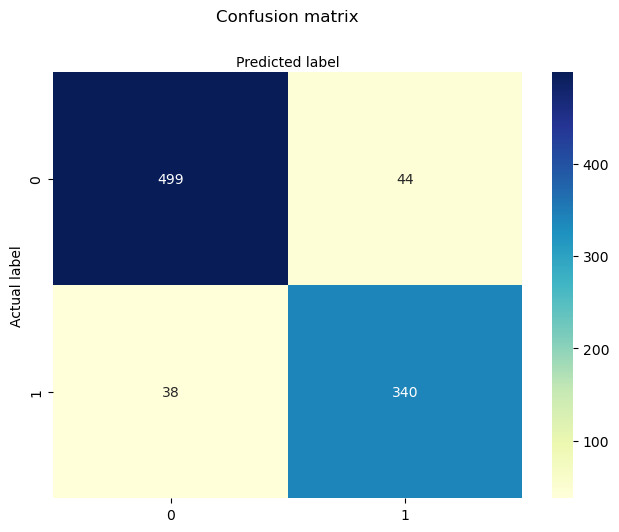

In [35]:
#visualizing the confusion matrix
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [37]:
from sklearn.metrics import classification_report
target_names = ['not spam', 'spam']
print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

    not spam       0.93      0.92      0.92       543
        spam       0.89      0.90      0.89       378

    accuracy                           0.91       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.91      0.91      0.91       921



##### ROC Curve 

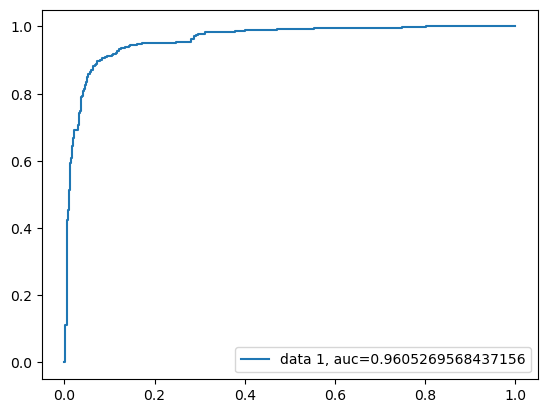

In [39]:
y_pred_proba = logistic_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
S